In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from postprocess_utils import *
import pandas as pd
import sqlalchemy

In [5]:
from utils import gen_data, gen_covariance, sparsify_beta, gen_beta2

In [6]:
root_dir = '/media/akumar/Data/nse'

In [7]:
uoi = pd.read_pickle('%s/finalfinal/uoi_concat_df.dat' % root_dir)
lasso = pd.read_pickle('%s/finalfinal/lasso_concat_df.dat' % root_dir)
mcp = pd.read_pickle('%s/finalfinal/mcp_concat_df.dat' % root_dir)
scad = pd.read_pickle('%s/finalfinal/scad_concat_df.dat' % root_dir)
en = pd.read_pickle('%s/finalfinal/en_concat_df.dat' % root_dir)

In [8]:
from plotting_utils import *
import h5py

In [9]:
import pickle

In [10]:
sparsity = np.unique(lasso['sparsity'].values)

In [11]:
def flatten(l):
    for el in l:
        if isinstance(el, collections.Iterable) and not isinstance(el, (str, bytes, dict)):
            yield from flatten(el)
        else:
            yield el

### Plotting

In [ ]:
# Note: this data is generated from parallel_eta_calculation.py

In [17]:
with open('/media/akumar/Data/nse/finalfinal/eta_scaling/eta_concat_wuoi.dat', 'rb') as f:
    eta_concat = pickle.load(f)

In [20]:
extra_elems = []
for elem in eta_concat:
    if type(elem) == list:
        extra_elems.extend(elem)
        eta_concat.remove(elem)

In [15]:
eta_concat = flatten(eta_concat)

In [23]:
eta_df = pd.DataFrame(eta_concat)

In [24]:
from collections import OrderedDict

In [26]:
dframe_names

array(['EN', 'Lasso', 'MCP', 'SCAD', 'UoI Lasso'], dtype=object)

In [25]:
dframe_names = np.unique(eta_df['df_name'].values)

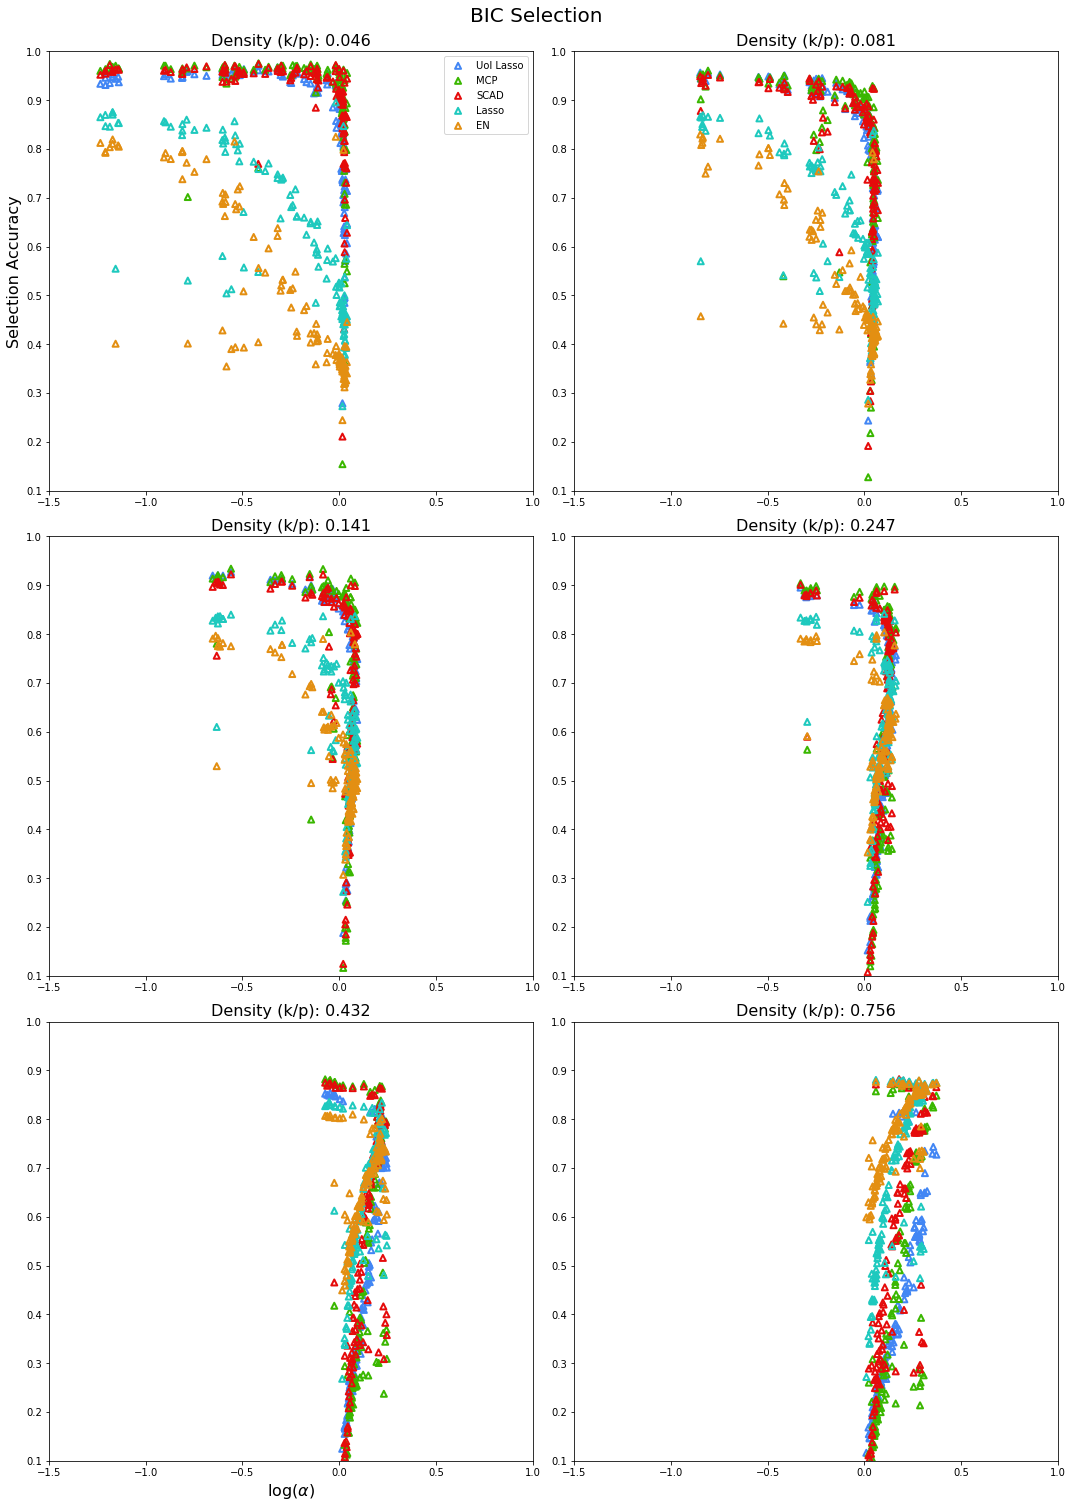

In [27]:
# Plot either the average selection accuracy or the percent of runs that exceed a certain threshold as a 
# function of the parameter alpha. alpha = rho(Omega) sum(beta_min^2)/sigma^2

# Calculate across signal to noise ratios, n/p ratio = 4
np_ratio = 4
kappa = 5
selection_method = 'BIC'
dframe_names = np.unique(eta_df['df_name'].values)
betawidth = np.unique(eta_df['betawidth'].values)
# Subsample sparsity
sparsity_ = [sparsity[3], sparsity[5], sparsity[7], sparsity[9], sparsity[11], sparsity[13]]

# Blue
c1 = ['#4286f4', '#99bdf7', '#00aeff']
# Green
c2 = ['#3ab700', '#bae288', '#64821d']
# Red
c3 = ['#e50b0b', '#ef5f5f', '#70001d']
# Cyan
c4 = ['#1ec9be', '#d799ff', '#572677']
# Orange
c5 = ['#e38f12']

dframe_names = ['UoI Lasso', 'MCP', 'SCAD', 'Lasso', 'EN']

# Per dframe
cols = [c1[0], c2[0], c3[0], c4[0], c5[0]]

# Per betawdith
marker_type = ['^', 'o', 's']
pal_colors = cols

# There will only be one curve over all snr, cov_params, betawidth, etc...
# np_ratio and selection methods will vary

# Create a separate subplot for each sparsity
fig, ax = plt.subplots(3, 2, figsize=(15, 22))

for h, s in enumerate(sparsity_):
    a = ax[np.unravel_index(h, (3,2))]
    for i, dframe in enumerate(dframe_names):      
        for k, bw in enumerate(betawidth):
            rows = apply_df_filters(eta_df, df_name=dframe, selection_method=selection_method,
                                    sparsity=s, betawidth=bw)
            for j in range(rows.shape[0]):
                 a.scatter(np.ma.log(rows.iloc[j]['eta'][0]), rows.iloc[j]['sa'][0], label=rows.iloc[j]['df_name'],
                           edgecolor=cols[list(dframe_names).index(rows.iloc[j]['df_name'])],
                           marker=marker_type[k], facecolor="None", lw=2)    
    a.set_xlim([-1.5, 1])     
    a.set_ylim([0.1, 1])
    a.set_title('Density (k/p): %.3f' % s, fontsize=16)
    
ax[0, 0].set_ylabel('Selection Accuracy', fontsize=16)
ax[2, 0].set_xlabel(r'$\log(\alpha)$', fontsize=16)
handles, labels = ax[0, 0].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax[0, 0].legend(by_label.values(), by_label.keys())

fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.suptitle('BIC Selection', fontsize=20)
plt.savefig('BICeta_scaling.pdf', bbox_inches='tight', pad_inches=0)

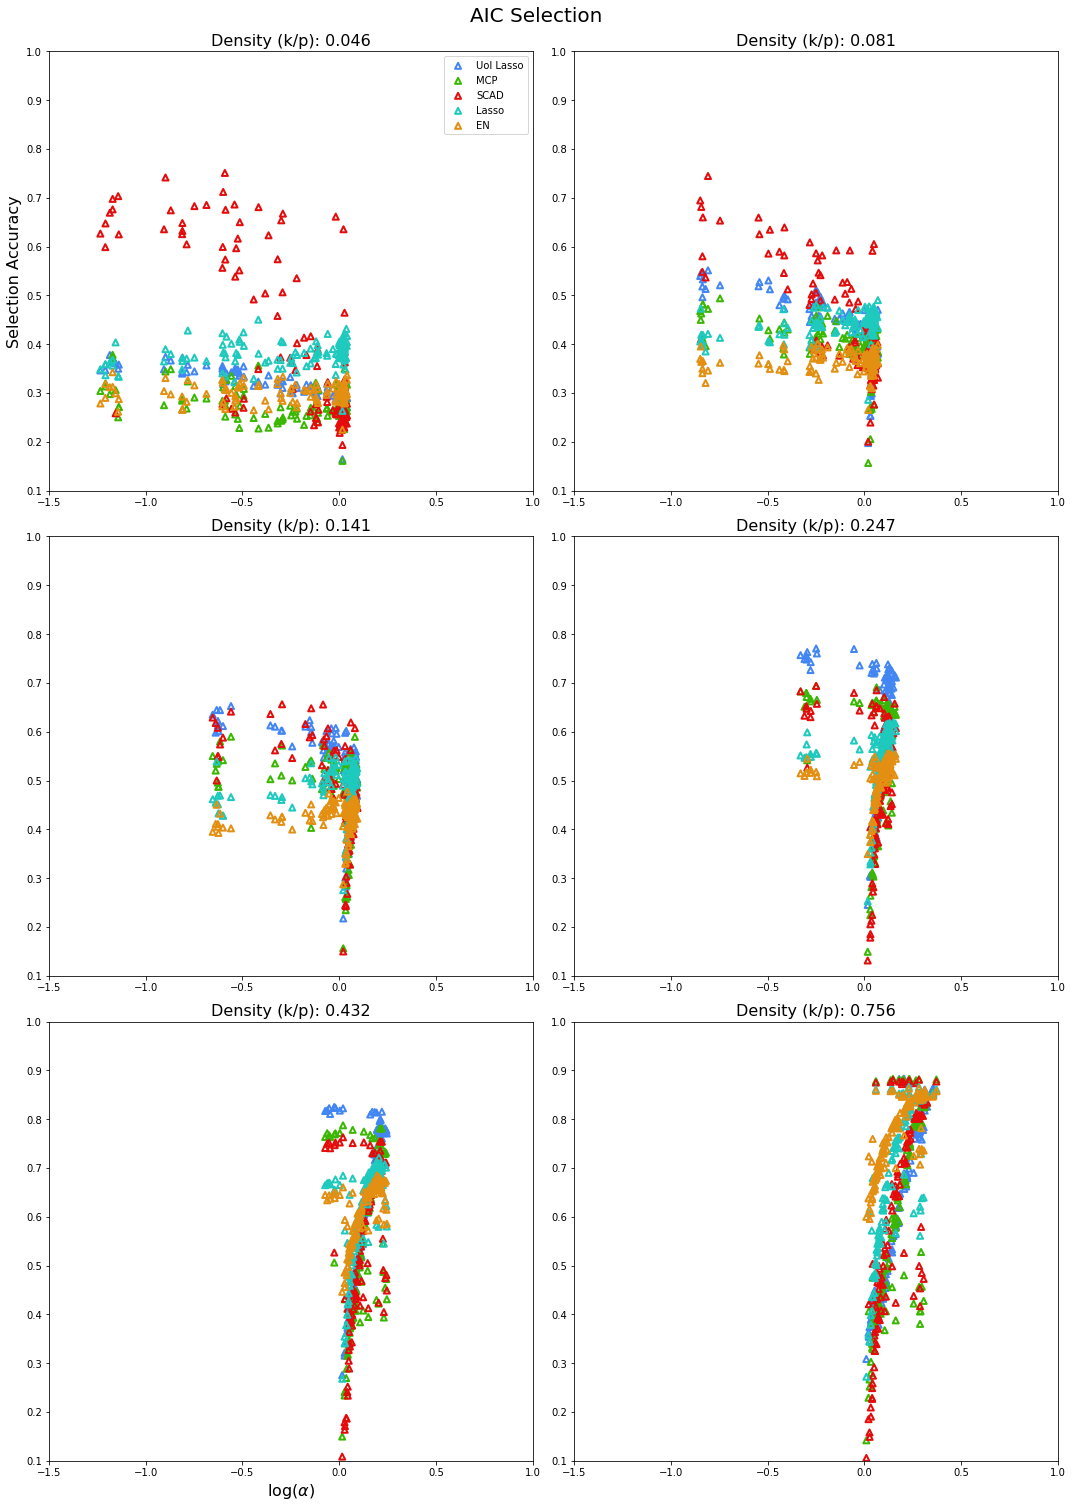

In [28]:
# Plot either the average selection accuracy or the percent of runs that exceed a certain threshold as a 
# function of the parameter alpha. alpha = rho(Omega) sum(beta_min^2)/sigma^2

# Calculate across signal to noise ratios, n/p ratio = 4
np_ratio = 4
kappa = 5
selection_method = 'AIC'
betawidth = np.unique(eta_df['betawidth'].values)
# Subsample sparsity
sparsity_ = [sparsity[3], sparsity[5], sparsity[7], sparsity[9], sparsity[11], sparsity[13]]

# Blue
c1 = ['#4286f4', '#99bdf7', '#00aeff']
# Green
c2 = ['#3ab700', '#bae288', '#64821d']
# Red
c3 = ['#e50b0b', '#ef5f5f', '#70001d']
# Cyan
c4 = ['#1ec9be', '#d799ff', '#572677']
# Orange
c5 = ['#e38f12']

dframe_names = ['UoI Lasso', 'MCP', 'SCAD', 'Lasso', 'EN']

# Per dframe
cols = [c1[0], c2[0], c3[0], c4[0], c5[0]]

# Per betawdith
marker_type = ['^', 'o', 's']
pal_colors = cols

# There will only be one curve over all snr, cov_params, betawidth, etc...
# np_ratio and selection methods will vary

# Create a separate subplot for each sparsity
fig, ax = plt.subplots(3, 2, figsize=(15, 22))

for h, s in enumerate(sparsity_):
    a = ax[np.unravel_index(h, (3,2))]
    for i, dframe in enumerate(dframe_names):      
        for k, bw in enumerate(betawidth):
            rows = apply_df_filters(eta_df, df_name=dframe, selection_method=selection_method,
                                    sparsity=s, betawidth=bw)
            for j in range(rows.shape[0]):
                 a.scatter(np.ma.log(rows.iloc[j]['eta'][0]), rows.iloc[j]['sa'][0], label=rows.iloc[j]['df_name'],
                           edgecolor=cols[list(dframe_names).index(rows.iloc[j]['df_name'])],
                           marker=marker_type[k], facecolor="None", lw=2)    
    a.set_xlim([-1.5, 1])     
    a.set_ylim([0.1, 1])
    a.set_title('Density (k/p): %.3f' % s, fontsize=16)
    
ax[0, 0].set_ylabel('Selection Accuracy', fontsize=16)
ax[2, 0].set_xlabel(r'$\log(\alpha)$', fontsize=16)
handles, labels = ax[0, 0].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax[0, 0].legend(by_label.values(), by_label.keys())

fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.suptitle('AIC Selection', fontsize=20)
plt.savefig('AICeta_scaling.pdf', bbox_inches='tight', pad_inches=0)

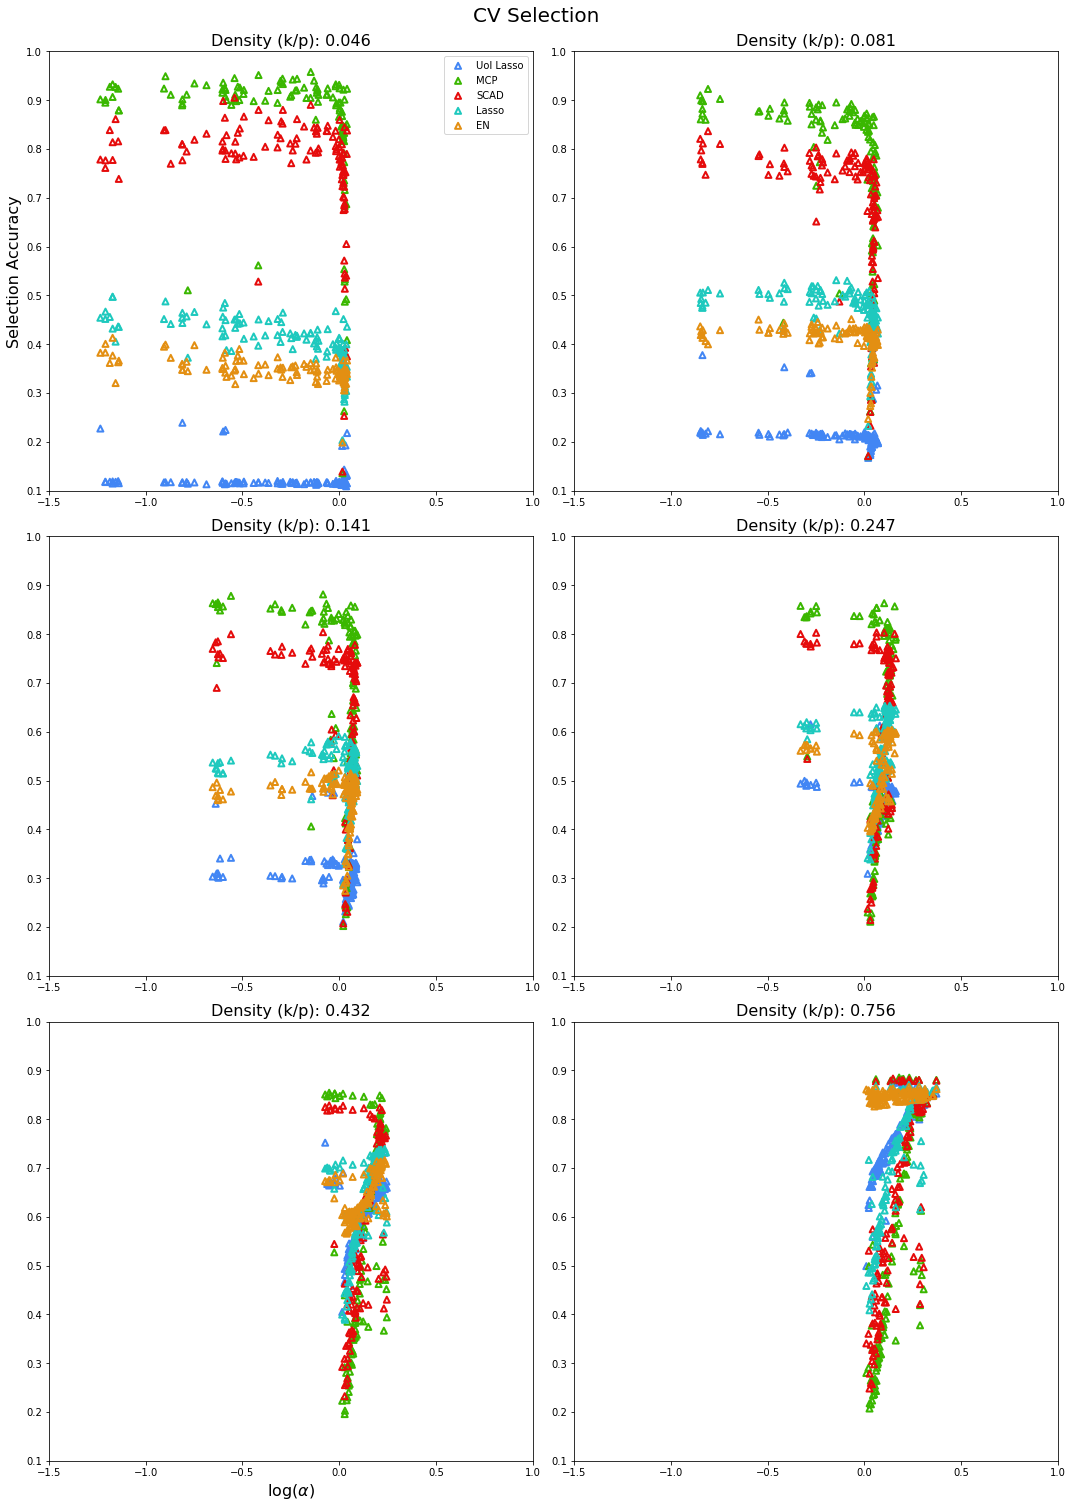

In [29]:
# Plot either the average selection accuracy or the percent of runs that exceed a certain threshold as a 
# function of the parameter alpha. alpha = rho(Omega) sum(beta_min^2)/sigma^2

# Calculate across signal to noise ratios, n/p ratio = 4
np_ratio = 4
kappa = 5
selection_method = 'CV'
dframe_names = ['UoI Lasso', 'MCP', 'SCAD', 'Lasso', 'EN']
betawidth = np.unique(eta_df['betawidth'].values)
# Subsample sparsity
sparsity_ = [sparsity[3], sparsity[5], sparsity[7], sparsity[9], sparsity[11], sparsity[13]]

# Blue
c1 = ['#4286f4', '#99bdf7', '#00aeff']
# Green
c2 = ['#3ab700', '#bae288', '#64821d']
# Red
c3 = ['#e50b0b', '#ef5f5f', '#70001d']
# Cyan
c4 = ['#1ec9be', '#d799ff', '#572677']
# Orange
c5 = ['#e38f12']

# Per dframe
cols = [c1[0], c2[0], c3[0], c4[0], c5[0]]

# Per betawdith
marker_type = ['^', 'o', 's']
pal_colors = cols

# There will only be one curve over all snr, cov_params, betawidth, etc...
# np_ratio and selection methods will vary

# Create a separate subplot for each sparsity
fig, ax = plt.subplots(3, 2, figsize=(15, 22))

for h, s in enumerate(sparsity_):
    a = ax[np.unravel_index(h, (3,2))]
    for i, dframe in enumerate(dframe_names):      
        for k, bw in enumerate(betawidth):
            rows = apply_df_filters(eta_df, df_name=dframe, selection_method=selection_method,
                                    sparsity=s, betawidth=bw)
            for j in range(rows.shape[0]):
                 a.scatter(np.ma.log(rows.iloc[j]['eta'][0]), rows.iloc[j]['sa'][0], label=rows.iloc[j]['df_name'],
                           edgecolor=cols[list(dframe_names).index(rows.iloc[j]['df_name'])],
                           marker=marker_type[k], facecolor="None", lw=2)    
    a.set_xlim([-1.5, 1])     
    a.set_ylim([0.1, 1])
    a.set_title('Density (k/p): %.3f' % s, fontsize=16)
    
ax[0, 0].set_ylabel('Selection Accuracy', fontsize=16)
ax[2, 0].set_xlabel(r'$\log(\alpha)$', fontsize=16)
handles, labels = ax[0, 0].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax[0, 0].legend(by_label.values(), by_label.keys())

fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.suptitle('CV Selection', fontsize=20)
plt.savefig('CVeta_scaling.pdf', bbox_inches='tight', pad_inches=0)